In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv('DUQ_hourly.csv')
df.head()

,Datetime,DUQ_MW
0,2005-12-31 01:00:00,1458.0
1,2005-12-31 02:00:00,1377.0
2,2005-12-31 03:00:00,1351.0
3,2005-12-31 04:00:00,1336.0
4,2005-12-31 05:00:00,1356.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119068 entries, 0 to 119067
Data columns (total 2 columns):
Datetime    119068 non-null object
DUQ_MW      119068 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.8+ MB


In [7]:
df.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


Text(0,0.5,'МВт')

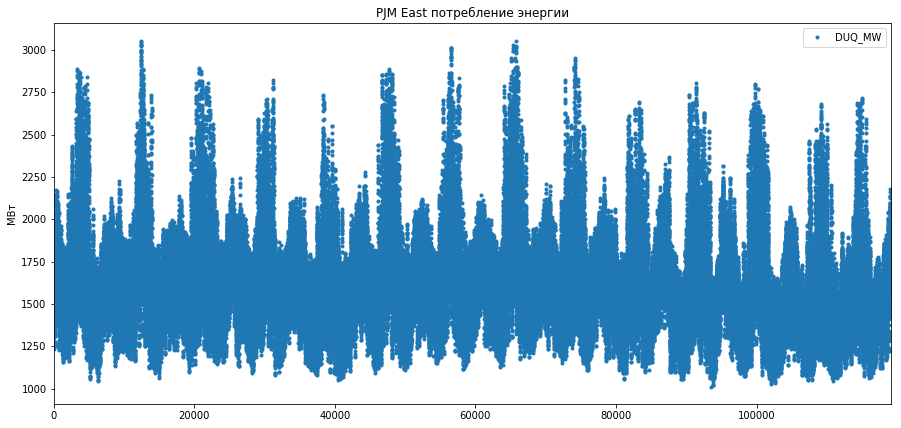

In [8]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'PJM East потребление энергии' )
plt.ylabel ( 'МВт' )

In [9]:
df['data'] = df.index

In [14]:
df['data'].unique()

array([     0,      1,      2, ..., 119065, 119066, 119067], dtype=int64)

### Brent

In [38]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [48]:
brent_data['data'] = brent_data.index
brent_data['year'] = brent_data['data'].dt.year
brent_data['month'] = brent_data['data'].dt.month
brent_data['weekofyear'] = brent_data['data'].dt.weekofyear
brent_data.tail()

,Значение,data,year,month,weekofyear
Дата,,,,,
2010-09-05,76.63,2010-09-05,2010,9,35
2010-09-04,76.62,2010-09-04,2010,9,35
2010-09-03,76.57,2010-09-03,2010,9,35
2010-09-02,76.89,2010-09-02,2010,9,35
2010-09-01,76.37,2010-09-01,2010,9,35


Text(0.5,0,'t')

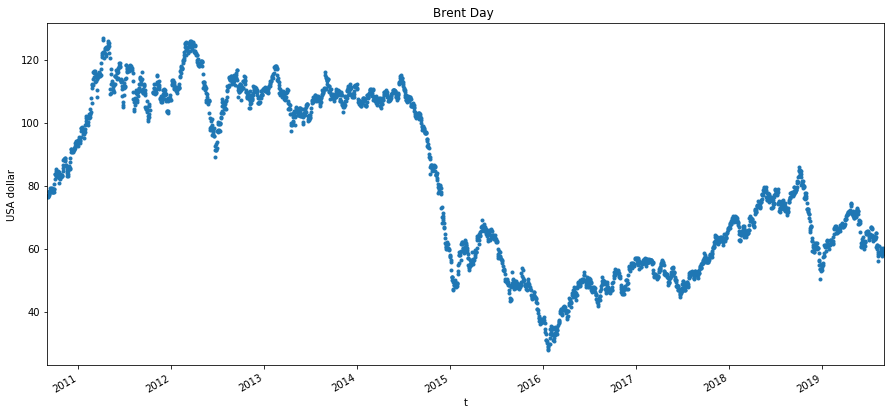

In [41]:
_ = brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent Day ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [49]:
brent_week = brent_data.resample("w").mean()
brent_week.tail()

,Значение,year,month,weekofyear
Дата,,,,
2019-08-04,62.791667,2019.0,7.500000,31.0
2019-08-11,58.236667,2019.0,8.000000,32.0
2019-08-18,59.033333,2019.0,8.000000,33.0
2019-08-25,59.495000,2019.0,8.000000,34.0
2019-09-01,59.348333,2019.0,8.166667,35.0


In [160]:
brent_week_deviation = []
temp = []
deviation = 0
nomber_week = 35
nomber_year = 2010
for i in range(len(brent_week)):
    temp = brent_data.loc[(brent_data['year'] == nomber_year) & (brent_data['weekofyear'] == nomber_week), 'Значение']
    mean = temp.mean()
    for i in temp:
        deviation += np.abs(mean - i)
    brent_week_deviation.append(deviation)
    deviation = 0
    if nomber_week == 52:
        nomber_year += 1
        nomber_week = 1
    else:
        nomber_week += 1

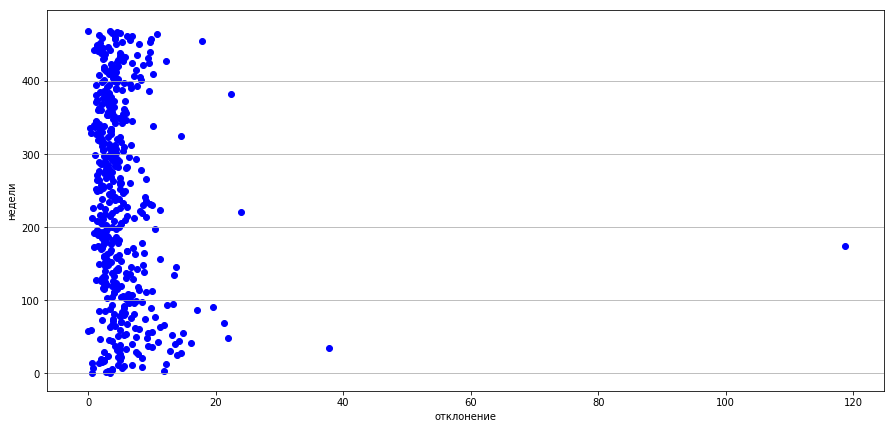

In [162]:
# среднее отклонение
plt.figure(figsize=(15,7))

ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)

plt.ylabel('недели')
plt.xlabel('отклонение')

for i in range(len(brent_week_deviation)):
    plt.scatter(brent_week_deviation[i], i, color = 'blue')

Text(0.5,0,'t')

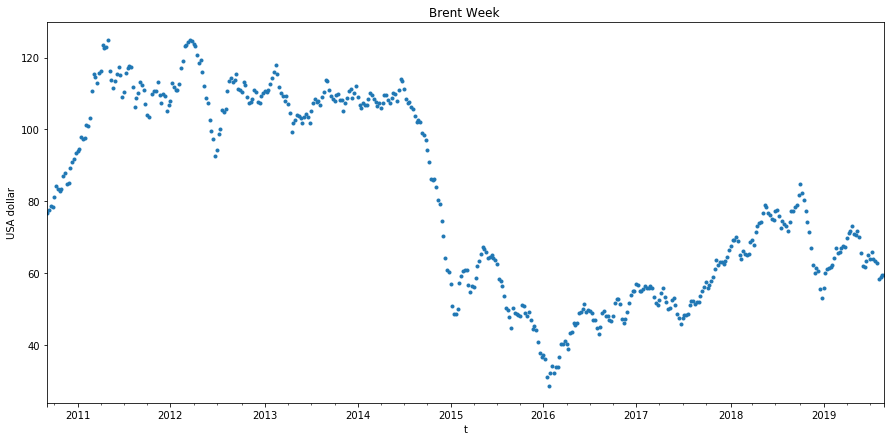

In [33]:
_ = brent_week['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent Week ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [146]:
brent_month = brent_data.resample("M").mean()
brent_month.head()

,Значение,year,month,weekofyear
Дата,,,,
2010-09-30,78.228148,2010.0,9.0,36.925926
2010-10-31,83.473462,2010.0,10.0,41.307692
2010-11-30,86.178077,2010.0,11.0,45.692308
2010-12-31,92.232308,2010.0,12.0,50.115385
2011-01-31,97.033200,2011.0,1.0,4.640000


In [181]:
brent_month_deviation = []
temp = []
deviation = 0
nomber_month = 9
nomber_year = 2010
for i in range(len(brent_month)):
    temp = brent_data.loc[(brent_data['year'] == nomber_year) & (brent_data['month'] == nomber_month), 'Значение']
    mean = temp.mean()
    for i in temp:
        deviation += np.abs(mean - i)
    brent_month_deviation.append(deviation)
    deviation = 0
    if nomber_month == 12:
        nomber_year += 1
        nomber_month = 1
    else:
        nomber_month += 1

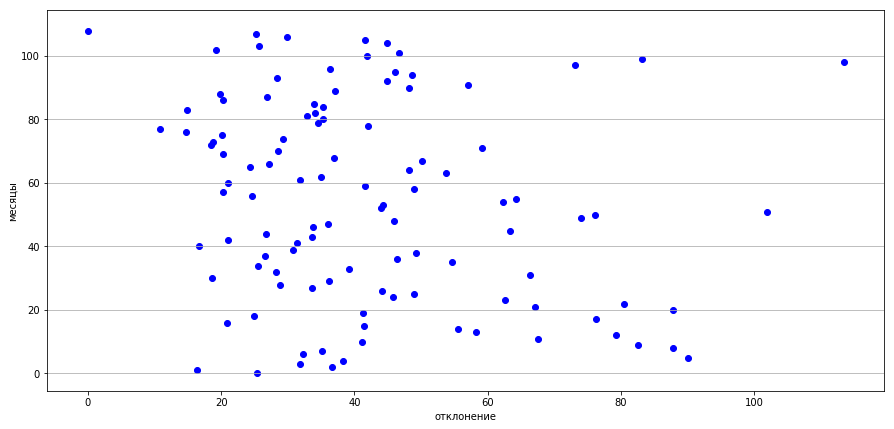

In [182]:
# среднее отклонение
plt.figure(figsize=(15,7))

ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)

plt.ylabel('месяцы')
plt.xlabel('отклонение')

for i in range(len(brent_month_deviation)):
    plt.scatter(brent_month_deviation[i], i, color = 'blue')

Text(0.5,0,'t')

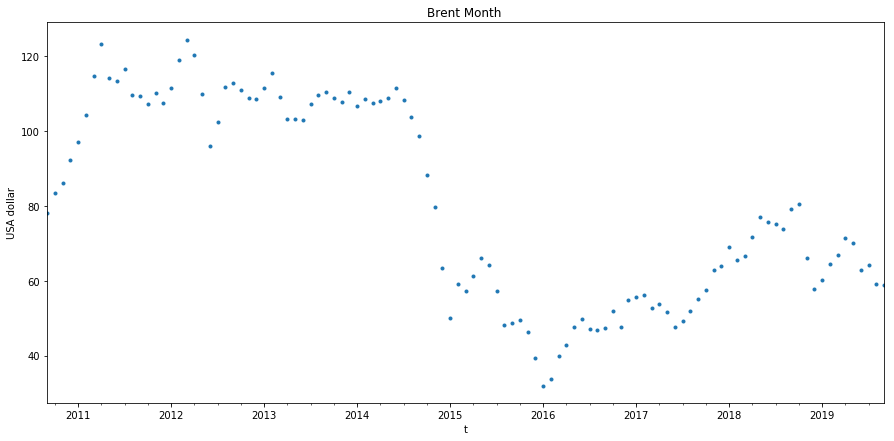

In [34]:
_ = brent_month['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent Month ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [30]:
brent_year = brent_data.resample("Y").mean()
brent_year.head()

,Значение
Дата,
2010-12-31,84.963238
2011-12-31,110.758746
2012-12-31,111.377484
2013-12-31,108.137114
2014-12-31,99.435493


In [171]:
brent_year_deviation = []
temp = []
deviation = 0
years = []
nomber_year = 2010
for i in range(len(brent_year)):
    temp = brent_data.loc[brent_data['year'] == nomber_year, 'Значение']
    mean = temp.mean()
    for i in temp:
        deviation += np.abs(mean - i)
    brent_year_deviation.append(deviation)
    deviation = 0
    years.append(nomber_year)
    nomber_year += 1

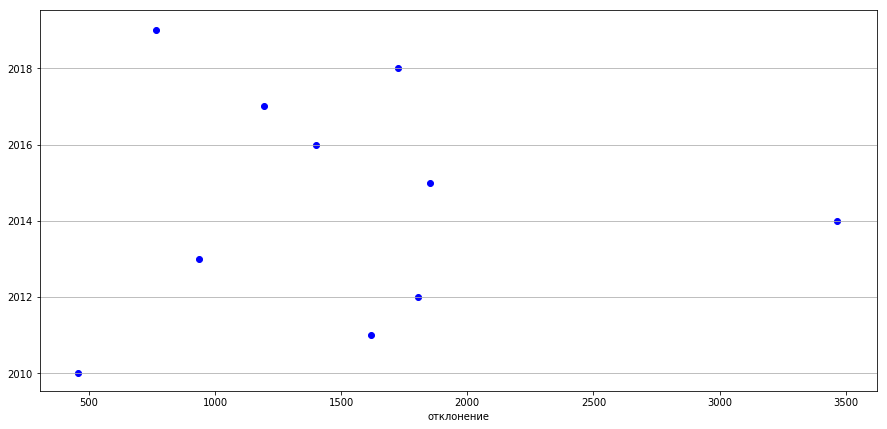

In [173]:
# среднее отклонение
plt.figure(figsize=(15,7))

ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)

plt.xlabel('отклонение')

for i in range(len(brent_year_deviation)):
    plt.scatter(brent_year_deviation[i], years[i], color = 'blue')

Text(0.5,0,'t')

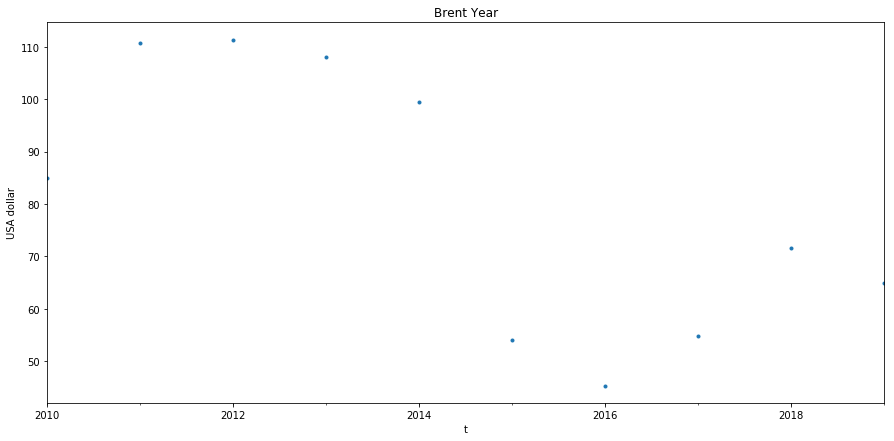

In [35]:
_ = brent_year['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent Year')
plt.ylabel('USA dollar')
plt.xlabel('t')

Поведение цены схоже независмо от масштаба, отклонение от среднего растет пропорционально таймфрейму